<a href="https://colab.research.google.com/github/alinemls/datasets/blob/main/Iris_Decision_Tree_Testev13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação de Bibliotecas

In [899]:
import numpy as np
import pandas as pd 
import seaborn as sns
import cv2
from numpy.core.numeric import NaN
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import export_text
from google.colab.patches import cv2_imshow
from sklearn import preprocessing
from scipy.stats import randint
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt
import six
import sys
sys.modules['sklearn.externals.six'] = six
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, cohen_kappa_score as kappa, confusion_matrix, classification_report
from IPython.display import Image
from sklearn.externals.six import StringIO  
import pydotplus
%matplotlib inline

In [900]:
n_base="iris"

In [901]:
num_grupos=3

In [902]:
qtd_faixas = 5

In [903]:
t_discre = "uniform"

In [904]:
qtd_teste = 0.3

In [905]:
df = pd.read_csv('https://raw.githubusercontent.com/alinemls/datasets/main/iris.csv')
df.head(5)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [906]:
base_original=df
print("=========> Base Original <=========\n",base_original)

#print("Descrição dos Dados:\n", base_original.describe())

# --> Remove nulls <--
data = base_original.dropna()
data = data.reset_index(drop = True)


if(num_grupos == 0): #<><><><><> Se a classe for o grupo <><><><><><>
  #print(data.columns[-1])
  #data[data.columns[-1]] = data[data.columns[-1]].map({0:'X'}, na_action='ignore')
  data[data.columns[-1]].replace(0, 'X', inplace = True)
  att_classe = data.iloc[: , -1]
  att_classe = att_classe.unique()
  qtd_classes = 0
  for item in att_classe:
    #print(item,i)
    #data.replace(to_replace=item, value=str(i))
    #data["species"].replace("setosa","kjkj", regex=True)
    data[data.columns[-1]].replace({item: qtd_classes}, inplace=True)
    qtd_classes = qtd_classes + 1
  data.columns = [*data.columns[:-1], 'grupo']
else:
  # --> Apagar Colunas classe <--
  if num_grupos > 0:
    #att_classe = "species"
    data = data.iloc[: , :-1] # Apaga o atributo classe (última coluna)


# Apaga o atributo ID
if 'ID' in data.columns:    
  data = data.drop(columns=["ID"]) 
if 'id' in data.columns: 
  data = data.drop(columns=["id"]) 

base_original = data

# --> Normalização <--
colunas = list(data.columns.values)
#print (colunas) 
#n_normalizacao = "Sem Normalização"
#if(p_normalizacao == 1):
#  data = scaler.fit_transform(data)
#  n_normalizacao = "Desvio Padrão"
#if(p_normalizacao == 2):
#  data = trans.fit_transform(data)
#  n_normalizacao = "Escala 0-1"

data = pd.DataFrame(data, columns = colunas)

print("\n\n\n")
print("=========> Base Modificada <=========\n",data)
#print("Descrição dos Dados:\n", data.describe())

=========> Base Original <=========
      sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]




=========> Base Modificada <=========
      sepal.length  sepal.width  petal.length  petal.width
0         

## Carregamento e Preparação das Bases

In [907]:
#df = pd.read_csv('https://raw.githubusercontent.com/alinemls/datasets/main/iris.csv')
#df.head(5)

In [908]:
#df.drop(labels=['Id'], axis=1, inplace=True, errors='ignore')

In [909]:
#df.head(5)

In [910]:
# Agrupamento pela identificação completa da planta
#df.groupby('variety').size()

##Preparação de Dados

In [911]:
#idCat,Cat = pd.factorize(df["variety"])
#idCat

In [912]:
#df['varietyCat']=idCat

In [913]:
#df.head()

In [914]:
#del df["variety"]

In [915]:
#df.head()

## Análise Exploratória

In [916]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [917]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [918]:
#sns.countplot(df["varietyCat"])

In [919]:
#sns.pairplot(df,hue="varietyCat")

In [920]:
#sns.swarmplot (x="varietyCat",y="petal.width",data=df)

In [921]:
#sns.swarmplot (x="varietyCat",y="petal.length",data=df)

##Agrupamento

In [922]:
if(num_grupos != 0): #<><><><><> Se a classe for o grupo <><><><><><>

  data = base_original
  
  grupos = KMeans(num_grupos, random_state=0).fit(data)

  data['grupo'] = grupos.labels_ # Cria uma coluna com o grupo de cada registro
  print("====> Base com Grupos <====\n\n",data)

print('Quantidade de Registros em cada Grupo:\n', data['grupo'].value_counts())

====> Base com Grupos <====

      sepal.length  sepal.width  petal.length  petal.width  grupo
0             5.1          3.5           1.4          0.2      1
1             4.9          3.0           1.4          0.2      1
2             4.7          3.2           1.3          0.2      1
3             4.6          3.1           1.5          0.2      1
4             5.0          3.6           1.4          0.2      1
..            ...          ...           ...          ...    ...
145           6.7          3.0           5.2          2.3      2
146           6.3          2.5           5.0          1.9      0
147           6.5          3.0           5.2          2.0      2
148           6.2          3.4           5.4          2.3      2
149           5.9          3.0           5.1          1.8      0

[150 rows x 5 columns]
Quantidade de Registros em cada Grupo:
 0    62
1    50
2    38
Name: grupo, dtype: int64


In [923]:
#idCat,Cat = pd.factorize(df["varietyCat"])
#idCat
#df['varietyCat']=idCat

In [924]:
#df.info()

In [925]:
#df['varietyCat'].value_counts()

In [926]:
#clf = KMeans()
#clf.fit(df)
#clf.labels_

In [927]:
#print(classification_report(df['varietyCat'],clf.labels_))

In [928]:
#print(confusion_matrix(df['varietyCat'],clf.labels_))

##Decision Tree

In [929]:
!pip install graphviz

In [930]:
import graphviz

In [931]:
from sklearn.tree import export_graphviz

dados:
     sepal.length sepal.width petal.length petal.width grupo
0            1.0         3.0          0.0         0.0     1
1            0.0         2.0          0.0         0.0     1
2            0.0         2.0          0.0         0.0     1
3            0.0         2.0          0.0         0.0     1
4            0.0         3.0          0.0         0.0     1
..           ...         ...          ...         ...   ...
145          3.0         2.0          3.0         4.0     2
146          2.0         1.0          3.0         3.0     0
147          3.0         2.0          3.0         3.0     2
148          2.0         2.0          3.0         4.0     2
149          2.0         2.0          3.0         3.0     0

[150 rows x 5 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sepal.length  150 non-null    object
 1   sepal.width  

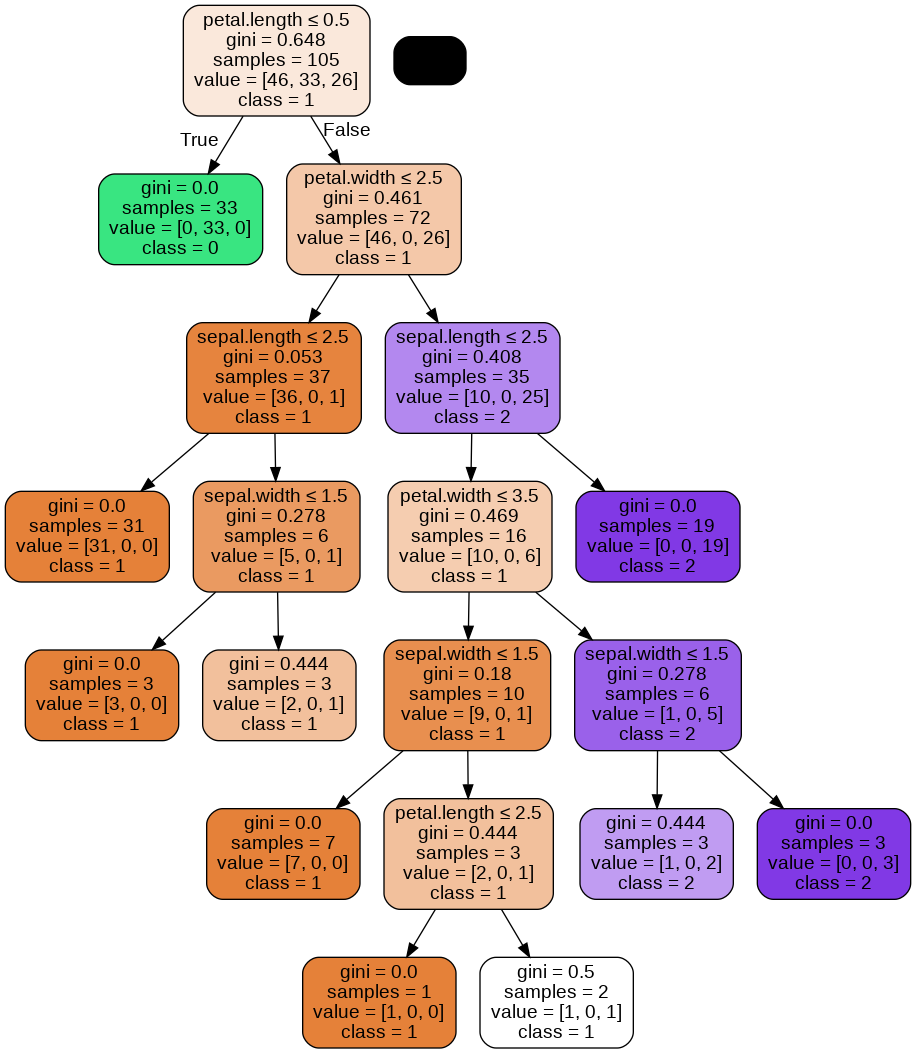

petal.length
0.5


In [932]:
t_saida_arv = 1 # 1 --> Grafica  // 0 --> Texto

#print(data)

if qtd_faixas != 0:
#<><><><><> Discretização <><><><><>
  base = data.drop(columns=['grupo']) # Apaga o grupo
  col_grupo = data["grupo"]
  col_nomes = list(base.columns)

  enc = KBinsDiscretizer(n_bins=qtd_faixas, strategy=t_discre, encode="ordinal")
  base_d = enc.fit_transform(base)
  base_d = pd.DataFrame(base_d,columns=col_nomes) 
  base_d['grupo'] = col_grupo

  #base_d.apply(base_d.to_numeric, errors='ignore')
  base_d = base_d.astype(str)

  data = base_d
  print("dados:\n",data)
  print(data.info())


i_col = data.columns.size 

print(i_col-1)

treino, teste = train_test_split(data, test_size = qtd_teste)
Y_train = treino.iloc[:, i_col-1]
Y_teste = teste.iloc[:, i_col-1]
X_train = treino.drop(treino.columns[i_col-1], axis=1)
X_teste = teste.drop(teste.columns[i_col-1], axis=1)

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_teste)

print("\nAcurácia da Árvore:",metrics.accuracy_score(Y_teste, y_pred), "\n")

feature_cols = X_teste.columns.to_list()
class_names = Y_teste.unique()

if(t_saida_arv == 1):
  
  acs = [str(x) for x in class_names]
  dot_data = StringIO()
  export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=acs)
  graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  graph.write_png(n_base+'.png')
  Image(graph.create_png())
  
  img = cv2.imread(n_base+'.png')
  cv2_imshow(img)

else:
    
  tree_rules = export_text(clf, feature_names = feature_cols) 
  #print the result
  print(tree_rules)

print(feature_cols[clf.tree_.feature[0]])
print(clf.tree_.threshold[0])

##Divisão dos Dados em Treino e Teste

In [933]:
#X=df.drop("varietyCat",axis=1)
#y=df["varietyCat"]
#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=100)

In [934]:
#X_train.shape

In [935]:
#y_train.shape

##Definição dos Hiperparâmetros

In [936]:
#params = [
      #{
        #'criterion':['gini','entropy'],
        #'max_depth':[None,2,4,8,10,30,50,100]  
      #}
#]
#clf = DecisionTreeClassifier(max_depth=50)
#grid_search = GridSearchCV(clf,params,scoring='accuracy')
#grid_search.fit(X_train,y_train)
#grid_search.best_params_

##Previsões

In [937]:
#clf.fit(X_train,y_train)
#pred = clf.predict(X_test)
#pred[:10]

In [938]:
#y_test[:10]

##Medições de Desempenho

In [939]:
#print("Acurácia: %.2f" % (clf.score(X_test,y_test)))

In [940]:
#clf.score(X_test,y_test)

In [941]:
#print("Coeficiente de Kappa: %.2f" % (kappa(y_test, clf.predict(X_test))) )

In [942]:
#cross = cross_val_score(clf,X_test,y_test,scoring="accuracy")
#final = sum(cross) / len(cross)
#final

In [943]:
#print(classification_report(y_test,pred))

In [944]:
#print(confusion_matrix(y_test,pred))

##Árvore de Decisão

In [945]:
#fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
#tree.plot_tree(clf,
               #feature_names = df.columns, 
               #class_names=['0','1','2'],
               #class_names=df.varietyCat,
               #filled = True
               #);
#Image("tree.png",width=400)

##Extração das Regras de Produção

In [946]:
!pip install graphviz

In [947]:
import graphviz

In [948]:
#df.columns.drop('grupo')

In [949]:
#dot_data = StringIO()
#tree_rules = export_text(clf, feature_names = feature_cols) 
#print(tree_rules)

from sklearn.tree import export_text
r = export_text(clf, feature_names = feature_cols)
print(r)
#export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True,feature_names = feature_cols,class_names=acs)
  #graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
  #graph.write_png(n_base+'.png')
  #Image(graph.create_png())
  
  #img = cv2.imread(n_base+'.png')
  #cv2_imshow(img)
#tree.export_graphviz(clf, out_file=None, 
                      #feature_names=df.columns.drop('varietyCat'),  
                      #class_names=['0','1','2'],  
                      #filled=True, rounded=True,  
                      #special_characters=True)  
#graph = graphviz.Source(dot_data)  
# graph
#graph.render(filename="iris", view=True, format='png')

|--- petal.length <= 0.50
|   |--- class: 1
|--- petal.length >  0.50
|   |--- petal.width <= 2.50
|   |   |--- sepal.length <= 2.50
|   |   |   |--- class: 0
|   |   |--- sepal.length >  2.50
|   |   |   |--- sepal.width <= 1.50
|   |   |   |   |--- class: 0
|   |   |   |--- sepal.width >  1.50
|   |   |   |   |--- class: 0
|   |--- petal.width >  2.50
|   |   |--- sepal.length <= 2.50
|   |   |   |--- petal.width <= 3.50
|   |   |   |   |--- sepal.width <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- sepal.width >  1.50
|   |   |   |   |   |--- petal.length <= 2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- petal.length >  2.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |--- petal.width >  3.50
|   |   |   |   |--- sepal.width <= 1.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal.width >  1.50
|   |   |   |   |   |--- class: 2
|   |   |--- sepal.length >  2.50
|   |   |   |--- class: 2



In [950]:
#from sklearn.tree import export_text
#r = export_text(clf, feature_names=['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])
#print(r)

##Relevância dos Atributos

In [951]:
feature_importance=pd.DataFrame({
    #'rfc':clf_rf.feature_importances_,
    'dt':clf.feature_importances_
},#index=df.drop(columns=['grupo']).columns)
feature_importance.sort_values(by='dt',ascending=True,inplace=True)

index = np.arange(len(feature_importance))
fig,ax = plt.subplots(figsize=(5,5))
#rfc_feature=ax.barh(index,feature_importance['rfc'],0.4,color='purple',label='Random Forest')
dt_feature=ax.barh(index+0.4,feature_importance['dt'],0.4,color='lightgreen',label='Decision Tree')
ax.set(yticks=index+0.4,yticklabels=feature_importance.index)
ax.set_title("Feature importances")
ax.legend()
plt.show()

SyntaxError: ignored